# Plotting word embeddings

**KEY CONCEPTS**
- Word embeddings / Word vectors
- Semantic space

**TOOLS**
- SpaCy word2vec (word vectorization)
- T-SNE (dimension reduction)
- matplotlib (plot vectors on cartesian grid)

In [1]:
# Open a text file for reading
file = open('animals.txt','r')

# Create a list of words from the text file
words = file.read().lower().split('\n')

# Print the first five words in the list as a sanity check
print(words[:5])

['canidae', 'felidae', 'cat', 'cattle', 'dog']


In [2]:
# Import SpaCy, a natural langauge processing library for Python
# https://spacy.io/
import spacy

# Load the medium language model
# https://spacy.io/models/en
nlp = spacy.load("en_core_web_md")

In [3]:
# Create a little function that "vectorizes" a given string
def vectorize(s):
    """Given a string, return the corresponding word embedding"""
    return nlp.vocab[s].vector

In [4]:
# Show the word embedding (i.e. word vector) for "cat"
vectorize("cat")

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [5]:
# Create an empty dictionary called "model"
model = {}

# For every word in our word list, get the corresponding
# word vector, and store it in our model
for word in words:
    model[word] = vectorize(word)

In [6]:
# Preview our model
model

{'canidae': array([-2.2821e-01,  1.8405e-01,  3.5676e-01, -7.4975e-01,  6.7651e-01,
         5.2926e-01,  8.4273e-02, -1.5906e-01,  2.9873e-01,  1.1813e-01,
        -1.5248e-01,  1.1789e-01, -4.3037e-01, -1.7087e-01,  1.5215e-01,
        -1.0848e-01, -1.3318e-01,  8.6705e-01,  1.2465e-01,  5.3072e-01,
         3.0319e-01,  1.7883e-01,  3.3421e-01, -1.0872e-01, -4.1389e-01,
         5.7836e-01, -3.4547e-01, -3.2104e-01,  1.2889e-01,  1.9348e-01,
        -3.3011e-01,  3.4330e-01,  3.2526e-01, -2.1123e-01, -5.4448e-02,
         3.5229e-01, -2.8981e-01, -4.2903e-02, -1.9468e-01, -1.5549e-01,
        -7.7415e-02,  1.4476e-02,  6.0719e-01,  2.3444e-01, -9.4367e-02,
         2.4881e-01, -1.8908e-01, -4.2991e-01,  4.6767e-03,  1.6338e-01,
        -8.2571e-02,  1.9586e-01,  9.8359e-01,  4.1336e-02,  3.9659e-01,
        -2.6746e-01, -4.8291e-02,  1.6943e-01, -4.2510e-02, -1.5602e-01,
         1.7777e-01, -4.9924e-01,  6.7234e-01,  1.8570e-01,  1.3189e-01,
        -2.1191e-01,  2.4327e-01, -6.014

In [7]:
# Look up a word embedding for a particular string in our model
model['cat']

array([-0.15067  , -0.024468 , -0.23368  , -0.23378  , -0.18382  ,
        0.32711  , -0.22084  , -0.28777  ,  0.12759  ,  1.1656   ,
       -0.64163  , -0.098455 , -0.62397  ,  0.010431 , -0.25653  ,
        0.31799  ,  0.037779 ,  1.1904   , -0.17714  , -0.2595   ,
       -0.31461  ,  0.038825 , -0.15713  , -0.13484  ,  0.36936  ,
       -0.30562  , -0.40619  , -0.38965  ,  0.3686   ,  0.013963 ,
       -0.6895   ,  0.004066 , -0.1367   ,  0.32564  ,  0.24688  ,
       -0.14011  ,  0.53889  , -0.80441  , -0.1777   , -0.12922  ,
        0.16303  ,  0.14917  , -0.068429 , -0.33922  ,  0.18495  ,
       -0.082544 , -0.46892  ,  0.39581  , -0.13742  , -0.35132  ,
        0.22223  , -0.144    , -0.048287 ,  0.3379   , -0.31916  ,
        0.20526  ,  0.098624 , -0.23877  ,  0.045338 ,  0.43941  ,
        0.030385 , -0.013821 , -0.093273 , -0.18178  ,  0.19438  ,
       -0.3782   ,  0.70144  ,  0.16236  ,  0.0059111,  0.024898 ,
       -0.13613  , -0.11425  , -0.31598  , -0.14209  ,  0.0281

In [8]:
# From SCIKITLEARN, import a module called TSNE
# TSNE stands for "T-distributed Stochastic Neighbor Embedding (t-SNE)"
# It is a machine learning algorithm that converts N-dimensional data
# (e.g. a word embedding) into two- or three- dimensional data
# (e.g. a position on a x,y plot).
# Read more: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
from sklearn.manifold import TSNE

In [9]:
# This cell contains complicated code and is not fully commented.
# It converts n-dimensional 

import matplotlib.pyplot as plt
labels = []
tokens = []
reduced_model = {}
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    #clean duplicates and append to a new dictionary
    #grabbing the coordinates
    coordinates = {}
    for i in range(len(labels)):
        coordinates[labels[i]] = new_values[i].tolist()
        
    #creating a new dictionary
    #only appends the name:coordinate if the coordinate value hasn't been in the list  
    for key in coordinates:
        name = key
        if coordinates[key] not in reduced_model.values():
            reduced_model[name] = coordinates[key]
    
    #scaling the data
    for name in reduced_model:
        reduced_model[name][0] = reduced_model[name][0]*1.5
        reduced_model[name][1] = reduced_model[name][1]*1.5
        
   
    #append back the coordinate for the plot
    coordinate_new = []
    for v in reduced_model.values():
        coordinate_new.append(v)
        
    #append back the labels for the plot
    label_new = []
    for key in reduced_model:
        label_new.append(key)

    for value in coordinate_new:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label_new[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [11]:
# Old embeddings vs new embeddings
print(model['cat'])
print('------------------')
print(reduced_model['cat'])

[-0.15067   -0.024468  -0.23368   -0.23378   -0.18382    0.32711
 -0.22084   -0.28777    0.12759    1.1656    -0.64163   -0.098455
 -0.62397    0.010431  -0.25653    0.31799    0.037779   1.1904
 -0.17714   -0.2595    -0.31461    0.038825  -0.15713   -0.13484
  0.36936   -0.30562   -0.40619   -0.38965    0.3686     0.013963
 -0.6895     0.004066  -0.1367     0.32564    0.24688   -0.14011
  0.53889   -0.80441   -0.1777    -0.12922    0.16303    0.14917
 -0.068429  -0.33922    0.18495   -0.082544  -0.46892    0.39581
 -0.13742   -0.35132    0.22223   -0.144     -0.048287   0.3379
 -0.31916    0.20526    0.098624  -0.23877    0.045338   0.43941
  0.030385  -0.013821  -0.093273  -0.18178    0.19438   -0.3782
  0.70144    0.16236    0.0059111  0.024898  -0.13613   -0.11425
 -0.31598   -0.14209    0.028194   0.5419    -0.42413   -0.599
  0.24976   -0.27003    0.14964    0.29287   -0.31281    0.16543
 -0.21045   -0.4408     1.2174     0.51236    0.56209    0.14131
  0.092514   0.71396   -0.02

KeyError: 'cat'

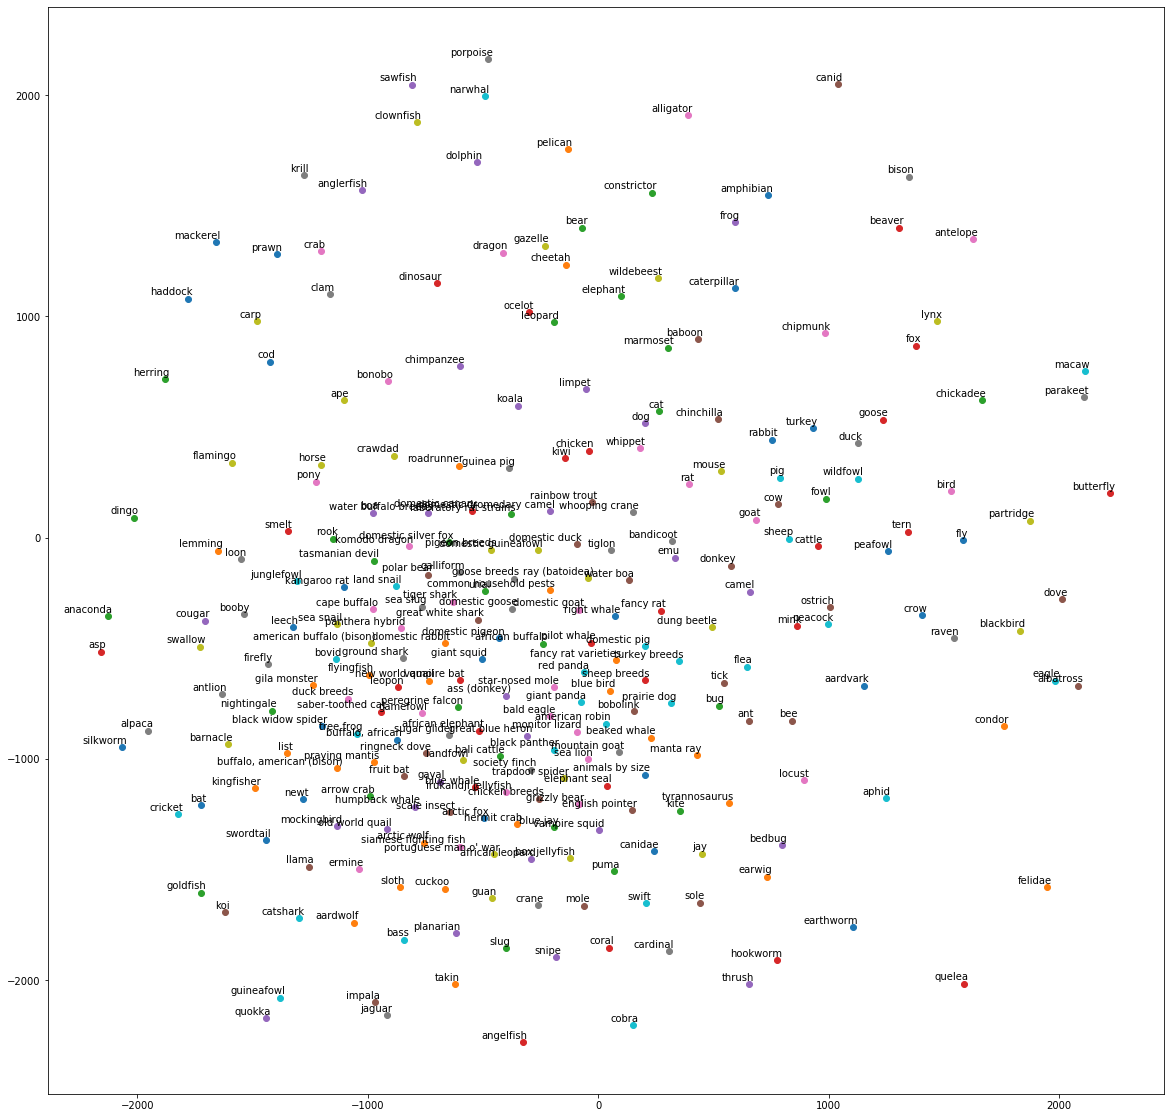

In [12]:
# Plot the words
tsne_plot(model)